Instructions:

Please make sure all the given files are uploded before executing the code. 

Files Required:

SMSSpamCollection

dlpng_com_Email_spam_Email_filtering_Anti-spam_techniques_-_email_png_____6580084.png

thumbs-up-512.jpg

glove.6B.200d.txt (Download from https://www.kaggle.com/datasets/incorpes/glove6b200d) 

You can run the each code block one by one to the end till completion

In [ ]:
import tensorflow as tf

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from collections import Counter

In [ ]:
# library for train test split
from sklearn.model_selection import train_test_split

In [ ]:
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
#loading dataset
messages = pd.read_csv("SMSSpamCollection", sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#displaying duplicate rows
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [ ]:
#checking no of duplicates
messages.duplicated().sum()
messages= messages.drop_duplicates(keep = 'first')

In [ ]:
messages.groupby('label').describe().T

label                                                         ham  \
message count                                                4516   
        unique                                               4516   
        top     Go until jurong point, crazy.. Available only ...   
        freq                                                    1   

label                                                        spam  
message count                                                 653  
        unique                                                653  
        top     Free entry in 2 a wkly comp to win FA Cup fina...  
        freq                                                    1

In [ ]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

In [ ]:
#mask for ham messages word cloud
mask = np.array(Image.open('thumbs-up-512.jpg'))

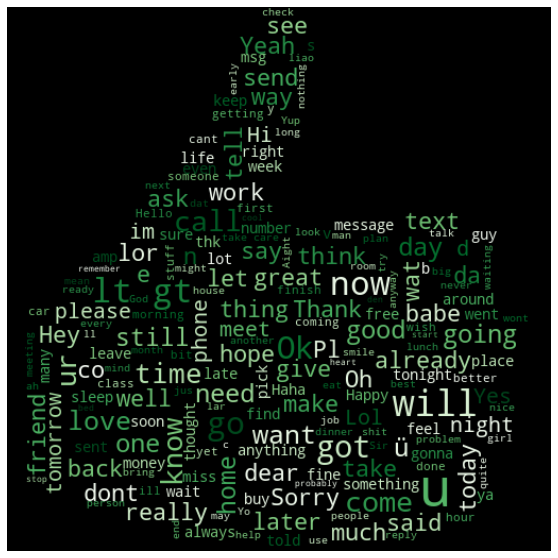

In [ ]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Greens', mask = mask).generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
#mask for spam messages word cloud
mask1 = np.array(Image.open('dlpng_com_Email_spam_Email_filtering_Anti-spam_techniques_-_email_png_____6580084.png'))

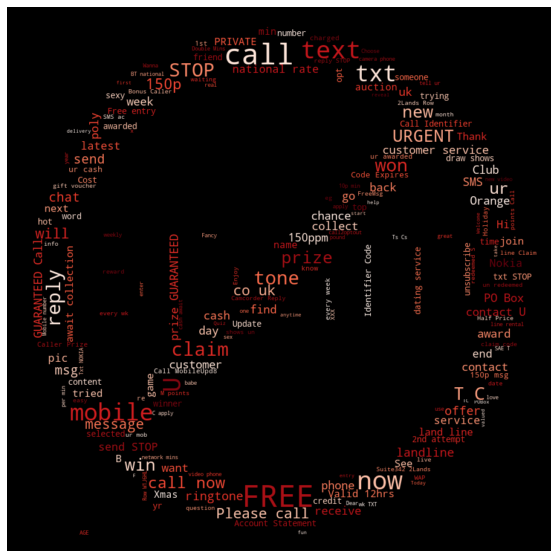

In [ ]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Reds',mask = mask1).generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
#message clean function
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
for idx in messages.index:
    text = clean_text(messages['message'][idx])
    messages.at[idx, "message"] = text

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


14.45969884853853

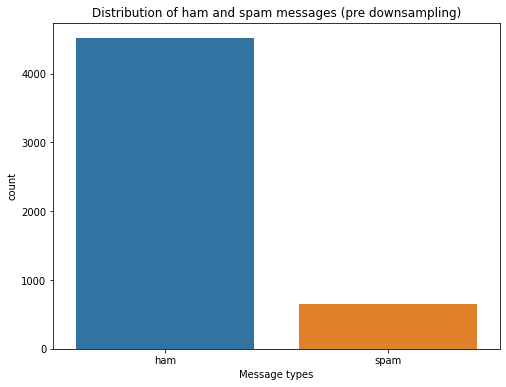

In [ ]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
plt.title('Distribution of ham and spam messages (pre downsampling)')
plt.xlabel('Message types')
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 14.26%

In [ ]:
#one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(653, 2) (653, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

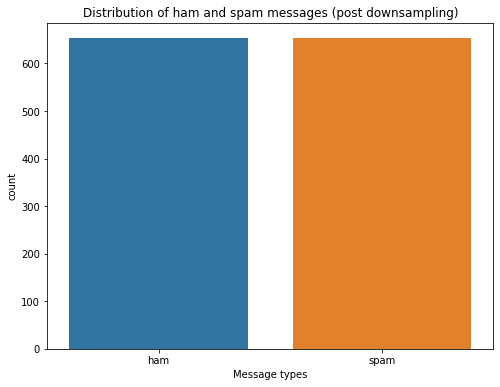

In [ ]:
#Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam messages (post downsampling)')
plt.xlabel('Message types')

In [ ]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,70.633997
spam,137.704441


In [ ]:
#splitting data into train and test datasets
x=messages.message
y=messages.label
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
#encoding the train and test datasets
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels
X_train_lenc = x_train1.tolist()
X_val_lenc = x_test1.tolist()

X_train_lenc = le.fit_transform(x_train1)
X_val_lenc = le.fit_transform(x_test1)

y_train_lenc = y_train1.tolist()
y_val_lenc = y_test1.tolist()

y_train_lenc = le.fit_transform(y_train1)
y_val_lenc = le.fit_transform(y_test1)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
 
# Fitting tokenizer on the training data                                  #

t = Tokenizer()
t.fit_on_texts(x_train1)
                                                                         
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #

word_index = {}

vocabulary = t.word_index

# Convert the messages in the dataset to their index form        #

encoded_train = t.texts_to_sequences(x_train1)
encoded_test = t.texts_to_sequences(x_test1)

# Pad the the training and validation sequences so all of them have the same length             # 

padded_train = pad_sequences(encoded_train, maxlen=200, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=200, padding='post')
print('Vocabulary : {}'.format(vocabulary))

Vocabulary : {'u': 1, 'call': 2, 'im': 3, '2': 4, 'get': 5, 'ur': 6, 'go': 7, 'dont': 8, '4': 9, 'ok': 10, 'know': 11, 'ltgt': 12, 'good': 13, 'free': 14, 'like': 15, 'come': 16, 'day': 17, 'got': 18, 'time': 19, 'want': 20, 'text': 21, 'ill': 22, 'love': 23, 'one': 24, 'need': 25, 'ü': 26, 'going': 27, 'send': 28, 'still': 29, 'home': 30, 'lor': 31, 'see': 32, 'r': 33, 'today': 34, 'think': 35, 'back': 36, 'take': 37, 'da': 38, 'well': 39, 'tell': 40, 'stop': 41, 'hi': 42, 'txt': 43, 'reply': 44, 'new': 45, 'n': 46, 'mobile': 47, 'sorry': 48, 'please': 49, 'oh': 50, 'phone': 51, 'much': 52, 'make': 53, 'night': 54, 'give': 55, 'week': 56, 'happy': 57, 'great': 58, 'say': 59, 'hope': 60, 'thing': 61, 'hey': 62, 'number': 63, 'claim': 64, 'already': 65, 'work': 66, 'friend': 67, 'cant': 68, 'way': 69, 'later': 70, 'thats': 71, 'wat': 72, 'yeah': 73, 'message': 74, 'let': 75, 'pls': 76, 'dear': 77, 'c': 78, 'right': 79, 'msg': 80, 'ask': 81, 'yes': 82, 'meet': 83, 'tomorrow': 84, 'ive': 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#performing Smote to balance the training data set
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(padded_train, y_train_lenc)

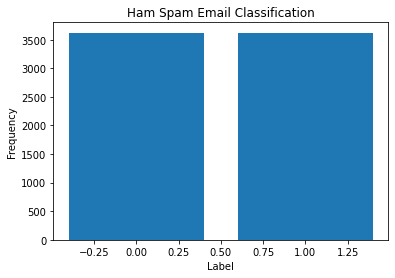

In [ ]:
plt.bar(Counter(y_train_res).keys(), Counter(y_train_res).values())
 
plt.title('Ham Spam Email Classification')

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#GloVe 6B word embeddings
glove_dictionary = {}
with open('glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coefficients = each_line.split(maxsplit=1)
        coefficients = np.array(coefficients.split(),dtype = float)
        glove_dictionary[words_in_line] = coefficients

In [ ]:
vocab_len=len(vocabulary)
embedding_matrix = np.zeros((vocab_len+1, 200))

# Creating the embedding matrix using the glove_dictionary             #

for word, i in vocabulary.items():
    embedding_vector = glove_dictionary.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(7668, 200)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Flatten

BiLSTM Model With GloVE Embedding

In [ ]:
#Bi-LSTM model using glove embedding
import tensorflow as tf

tf.random.set_seed(42)

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = tf.keras.Sequential()

  #layer 1 : add embedding layer
  model.add(tf.keras.layers.Embedding(input_dim=vocab_len +1, output_dim=200, weights=[embedding_matrix], input_length=200, trainable=False))

  #layer 2 : add Bidirectional LSTM Layer 
  model.add(tf.keras.layers.Bidirectional(LSTM(150, return_sequences=True)))

  model.add(tf.keras.layers.Dropout(0.5))

  #Adding more layers : adding more dense layers and dropout
  model.add(tf.keras.layers.Bidirectional(LSTM(150, return_sequences=True)))

  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(128, activation='relu'))

  model.add(Flatten())

  model.add(tf.keras.layers.Dropout(0.5))

  #Final layer : add output layer and activation 
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  #Using a loss function, optimizer as adam to compile 
  #evaluating model on auc,precision,recall,accuracy
  adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
  model.compile(loss = 'binary_crossentropy' , optimizer = adam, metrics = ['Accuracy','AUC','Precision','Recall'])
  return model

In [ ]:
# Calling the build_model function and initialize the model        #
model1 = build_model(embedding_matrix)
model1.summary()

# training and validating the model on the padded sequences of text which we have created initially        #

history1 = model1.fit(x_train_res, y_train_res, validation_data=(padded_test,y_val_lenc), epochs=15,batch_size = 50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          832000    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 300)         421200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 300)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 300)         541200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200, 300)          0         
                                                                 
 dense (Dense)               (None, 200, 128)          3

In [ ]:
#Conveting the test data into padded sequence
X_test_indices = t.texts_to_sequences(x_test1)

X_test_indices = pad_sequences(X_test_indices, maxlen=200, padding='post')

In [ ]:
#Metrics for BiLSTM with GloVe Embedding
print("Evaluate on test data")
results = model1.evaluate(X_test_indices, y_val_lenc)
print("test loss, test acc, test auc, test, precision, test recall:", results)

Evaluate on test data
33/33 [==============================] - 11s 341ms/step - loss: 0.1023 - Accuracy: 0.9610 - auc: 0.9888 - precision: 0.8000 - recall: 0.9231
test loss, test acc, test auc, test, precision, test recall: [0.1022995337843895, 0.961013674736023, 0.9887791872024536, 0.800000011920929, 0.9230769276618958]


In [ ]:
#F1 Score calculation for BiLSTM with GloVe Embedding
f1_scr1 = 2 * (results[3] * results[4]) / (results[3] + results[4])
print("F1 Score:",f1_scr1)

F1 Score: 0.8571428659619117


In [ ]:
#predicting the output of the model using a random test sample
preds = model1.predict(X_test_indices)

n = np.random.randint(0,299)

x_test1.iloc[n]
print(x_test1.iloc[n])
if preds[n] > 0.5:
  print('predicted sentiment : Spam')
else: 
  print('precicted sentiment : Ham')

if (y_test1.iloc[n] == "Ham" or y_test1.iloc[n]=="ham"):
  print('correct sentiment : Ham')
else:
  print('correct sentiment : Spam')

got tallent wasting
precicted sentiment : Ham
correct sentiment : Ham


In [ ]:
#importing pretrained vector
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
#initalising word2vec embedded matrix
vector_size = 100
gensim_weight_matrix = np.zeros((10000 ,vector_size))
gensim_weight_matrix.shape

(10000, 100)

In [ ]:
vocab_len=len(vocabulary)
embedding_matrix = np.zeros((vocab_len+1, 200))

# Create the embedding matrix using the word2vec dictionary             #
for word, i in vocabulary.items():
    embedding_vector = glove_dictionary.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
for word, index in vocabulary.items():
  if index < 10000: # since index starts with zero 
      if word in glove_gensim.wv.vocab:
          gensim_weight_matrix[index] = glove_gensim[word]
      else:
          gensim_weight_matrix[index] = np.zeros(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


BiLSTM model with Word2Vec Embedding

In [ ]:
#Bi-LSTM model with word2Vec embedding
def build_model_word2vec(gensim_weight_matrix):
  model = Sequential()
  #layer 1 : add embedding layer
  model.add(Embedding(input_dim = 10000, output_dim = 100, input_length= 200, weights = [gensim_weight_matrix],trainable = False))
  model.add(Dropout(0.2))
  #layer 2 : add Bidirectional LSTM Layer 
  model.add(tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)))

  model.add(tf.keras.layers.Dropout(0.5))

  #Adding more dense layers and dropout

  model.add(tf.keras.layers.Bidirectional(LSTM(200, return_sequences=True)))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(64, activation='relu'))

  model.add(Flatten())

  model.add(tf.keras.layers.Dropout(0.2))

  # Final layer : adding output layer and activation 
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
  model.compile(loss = 'binary_crossentropy' , optimizer = adam, metrics = ['Accuracy','AUC','Precision','Recall'])
  return model

In [ ]:
# Calling the build_model function and initialize the model        #
model2 = build_model_word2vec(gensim_weight_matrix)
model2.summary()

# training and validating the model on the padded sequences of text which we have created initially        #

history2 = model2.fit(x_train_res, y_train_res, validation_data=(padded_test,y_val_lenc), epochs=15,batch_size = 50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 dropout_3 (Dropout)         (None, 200, 100)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 200)         160800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 200, 200)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 200, 400)         641600    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 200, 400)         

In [ ]:
#Metrics for BiLSTM with Word2Vec Embedding
print("Evaluate on test data")
results1 = model2.evaluate(X_test_indices, y_val_lenc)
print("test loss, test acc, test auc, test, precision, test recall:", results1)

Evaluate on test data
33/33 [==============================] - 13s 377ms/step - loss: 0.1227 - Accuracy: 0.9552 - auc: 0.9850 - precision: 0.7727 - recall: 0.9154
test loss, test acc, test auc, test, precision, test recall: [0.12268398702144623, 0.955165684223175, 0.9850188493728638, 0.7727272510528564, 0.9153845906257629]


In [ ]:
#F1 Score Calculation for BiLSTM with GloVe Embedding
f1_scr2 = 2 * (results1[3] * results1[4]) / (results1[3] + results1[4])
print("F1 Score:",f1_scr2)

F1 Score: 0.8380281458923066


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=200)

In [ ]:
#Creating tf-idf vector
tfidf.fit(x_train1)

TfidfVectorizer(max_features=200)

In [ ]:
#Transforming the training and test data using tf-idf vectorizer
X_train_transformed = tfidf.transform(x_train1)
X_test_transformed  = tfidf.transform(x_test1)

In [ ]:
#Performing Smote to balance the training data set
sm = SMOTE(random_state=12)
x_train_res1, y_train_res1 = sm.fit_resample(X_train_transformed, y_train1)

Multinomial NB using TF-IdF vectorizer

In [ ]:
#Multinomial NB using TF-IdF vectorizer
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Fit
mnb.fit(x_train_res1,y_train_res1)

# Predict class
y_pred_class1 = mnb.predict(X_test_transformed)
# Predict probabilities
y_pred_proba1 = mnb.predict_proba(X_test_transformed)

In [ ]:
# Metrics of Multinomial NB with TF-IdF
from sklearn import metrics
mnb_tfidf_acc = metrics.accuracy_score(y_test1, y_pred_class1)
print("Accuracy:",mnb_tfidf_acc)
mnb_tfidf_pre = metrics.precision_score(y_test1, y_pred_class1,pos_label='spam')
print("Precision:",mnb_tfidf_pre)
mnb_tfidf_rec = metrics.recall_score(y_test1, y_pred_class1,pos_label='spam')
print("Recall:",mnb_tfidf_rec)
mnb_tfidf_f1 = metrics.f1_score(y_test1, y_pred_class1,pos_label='spam')
print("F1 Score:",mnb_tfidf_f1)

Accuracy: 0.9294003868471954
Precision: 0.6830601092896175
Recall: 0.8928571428571429
F1 Score: 0.7739938080495357


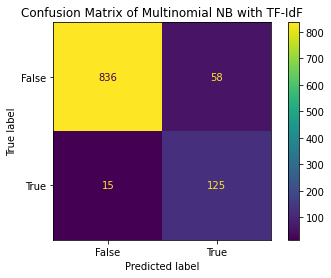

In [ ]:
#Confusion Matrix of Multinomial NB with TF-IdF
confusion_matrix1 = metrics.confusion_matrix(y_test1, y_pred_class1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Multinomial NB with TF-IdF')
plt.show()

In [ ]:
%pip install zeugma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8823 sha256=f1a6822f308c0cc68b0a2bd87874ac356cb5fdbddaf26488638e2286ea077a82
  Stored in directory: /root/.cache/pip/wheels/1d/47/5b/2a59a79706cc9340c72fd6a7bfc20e7ebcab849c88c38fdfa0
Successfully built zeugma


In [ ]:
from zeugma.embeddings import EmbeddingTransformer
glove = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
#Transforming training and test data using glove 
xtrain_glove = glove.transform(x_train1)
xval_glove = glove.transform(x_test1)

In [ ]:
#Performing Smote on training data
sm = SMOTE(random_state=12)
x_train_res2, y_train_res2 = sm.fit_resample(xtrain_glove, y_train1)

In [ ]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
w2v_model=gensim.models.Word2Vec(x_train1,min_count=4,size=200, workers=4)
w2v_words=list(w2v_model.wv.vocab)

In [ ]:
#Creating training data using word2Vec vocab
list_of_msg_vec=[]
#tqdm is for improving speed
for msg in tqdm(x_train1): 
    msg_vec = np.zeros(200) 
    cnt_words =0; 
    for word in msg: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            msg_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        msg_vec /= cnt_words
    list_of_msg_vec.append(msg_vec)

100%|██████████| 4135/4135 [00:00<00:00, 4349.57it/s]


In [ ]:
#Transforming training data using word2Vec 
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(list_of_msg_vec)
train_vec = train_vec.tolist()

In [ ]:
#Creating test data using word2Vec vocab
list_of_msg_vec=[]

for msg in tqdm(x_test1): 
    msg_vec = np.zeros(200) 
    cnt_words =0; 
    for word in msg: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            msg_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        msg_vec /= cnt_words
    list_of_msg_vec.append(msg_vec)

100%|██████████| 1034/1034 [00:00<00:00, 4021.57it/s]


In [ ]:
#Transforming test data using word2Vec 
test_vec = Scaler.fit_transform(list_of_msg_vec)

In [ ]:
#Performing Smote on training data
sm = SMOTE(random_state=12)
x_train_res3, y_train_res3 = sm.fit_resample(train_vec, y_train1)

Logistic Regression using Tf-Idf

In [ ]:
#logisticRegression using Tf-Idf 
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter = 1000)
#fit
lg.fit(x_train_res1,y_train_res1)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class2 = lg.predict(X_test_transformed)

# predict probabilities
y_pred_proba2 = lg.predict_proba(X_test_transformed)

In [ ]:
# Metrics of Logistic Regression with TF-IdF
from sklearn import metrics
lr_tfidf_acc = metrics.accuracy_score(y_test1, y_pred_class2)
print("Accuracy:",lr_tfidf_acc)
lr_tfidf_pre = metrics.precision_score(y_test1, y_pred_class2,pos_label='spam')
print("Precision:",lr_tfidf_pre)
lr_tfidf_rec = metrics.recall_score(y_test1, y_pred_class2,pos_label='spam')
print("Recall:",lr_tfidf_rec)
lr_tfidf_f1 = metrics.f1_score(y_test1, y_pred_class2,pos_label='spam')
print("F1 Score:",lr_tfidf_f1)

Accuracy: 0.9323017408123792
Precision: 0.6988636363636364
Recall: 0.8785714285714286
F1 Score: 0.7784810126582279


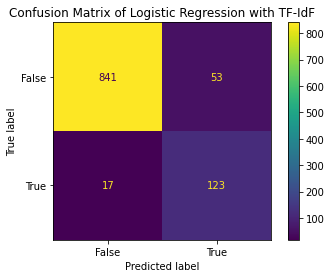

In [ ]:
#Confusion Matrix of Logistic Regression with TF-IdF
confusion_matrix2 = metrics.confusion_matrix(y_test1, y_pred_class2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Logistic Regression with TF-IdF')
plt.show()

Logistic regression with GloVe

In [ ]:
#fit logistic regression with glove
lg.fit(x_train_res2,y_train_res2)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class3 = lg.predict(xval_glove)

# predict probabilities
y_pred_proba3 = lg.predict_proba(xval_glove)

In [ ]:
# Metrics of Logistic Regression with glove
from sklearn import metrics
lr_glv_acc = metrics.accuracy_score(y_test1, y_pred_class3)
print("Accuracy:",lr_glv_acc)
lr_glv_pre = metrics.precision_score(y_test1, y_pred_class3,pos_label='spam')
print("Precision:",lr_glv_pre)
lr_glv_rec = metrics.recall_score(y_test1, y_pred_class3,pos_label='spam')
print("Recall:",lr_glv_rec)
lr_glv_f1 = metrics.f1_score(y_test1, y_pred_class3,pos_label='spam')
print("F1 Score:",lr_glv_f1)

Accuracy: 0.8974854932301741
Precision: 0.5758928571428571
Recall: 0.9214285714285714
F1 Score: 0.7087912087912087


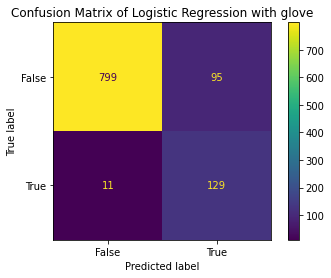

In [ ]:
#Confusion Matrix of Logistic Regression with glove
confusion_matrix3 = metrics.confusion_matrix(y_test1, y_pred_class3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Logistic Regression with glove')
plt.show()

Logistic Regression with Word2Vec

In [ ]:
#fit logistic regression with word2vec
lg.fit(x_train_res3,y_train_res3)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class4 = lg.predict(test_vec)

# predict probabilities
y_pred_proba4 = lg.predict_proba(test_vec)

In [ ]:
# Metrics of Logistic Regression with word2Vec
from sklearn import metrics
lr_w2v_acc = metrics.accuracy_score(y_test1, y_pred_class4)
print("Accuracy:",lr_w2v_acc)
lr_w2v_pre = metrics.precision_score(y_test1, y_pred_class4,pos_label='spam')
print("Precision:",lr_w2v_pre)
lr_w2v_rec = metrics.recall_score(y_test1, y_pred_class4,pos_label='spam')
print("Recall:",lr_w2v_rec)
lr_w2v_f1 = metrics.f1_score(y_test1, y_pred_class4,pos_label='spam')
print("F1 Score:",lr_w2v_f1)

Accuracy: 0.9487427466150871
Precision: 0.7701863354037267
Recall: 0.8857142857142857
F1 Score: 0.8239202657807309


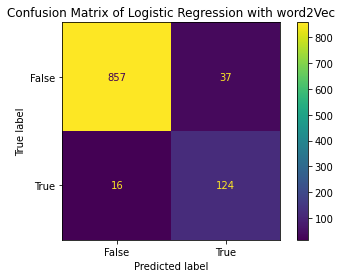

In [ ]:
#Confusion Matrix of Logistic Regression with word2Vec
confusion_matrix4 = metrics.confusion_matrix(y_test1, y_pred_class4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Logistic Regression with word2Vec')
plt.show()

Random Forest Classifier using Tf-idf

In [ ]:
#Random Forest using Tf-Idf
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=500)
#fit
rf.fit(x_train_res1,y_train_res1)

RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=500)

In [ ]:
y_pred_class5 = rf.predict(X_test_transformed)

# predict probabilities
y_pred_proba5 = rf.predict_proba(X_test_transformed)

In [ ]:
# Metrics of Random Forest with Tf-Idf
from sklearn import metrics
rf_tfidf_acc = metrics.accuracy_score(y_test1, y_pred_class5)
print("Accuracy:",rf_tfidf_acc)
rf_tfidf_pre = metrics.precision_score(y_test1, y_pred_class5,pos_label='spam')
print("Precision:",rf_tfidf_pre)
rf_tfidf_rec = metrics.recall_score(y_test1, y_pred_class5,pos_label='spam')
print("Recall:",rf_tfidf_rec)
rf_tfidf_f1 = metrics.f1_score(y_test1, y_pred_class5,pos_label='spam')
print("F1 Score:",rf_tfidf_f1)

Accuracy: 0.9564796905222437
Precision: 0.8187919463087249
Recall: 0.8714285714285714
F1 Score: 0.8442906574394465


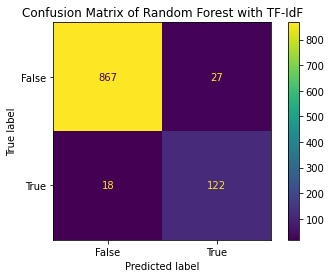

In [ ]:
#Confusion Matrix of Random Forest with TF-IdF
confusion_matrix5 = metrics.confusion_matrix(y_test1, y_pred_class5)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Random Forest with TF-IdF')
plt.show()

Random Forest Classifier with GloVe

In [ ]:
#fit Random Forest with glove
rf.fit(x_train_res2,y_train_res2)

RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=500)

In [ ]:
y_pred_class6 = rf.predict(xval_glove)

# predict probabilities
y_pred_proba6 = rf.predict_proba(xval_glove)

In [ ]:
# Metrics of Random Forest with glove
from sklearn import metrics
rf_glv_acc = metrics.accuracy_score(y_test1, y_pred_class6)
print("Accuracy:",rf_glv_acc)
rf_glv_pre = metrics.precision_score(y_test1, y_pred_class6,pos_label='spam')
print("Precision:",rf_glv_pre)
rf_glv_rec = metrics.recall_score(y_test1, y_pred_class6,pos_label='spam')
print("Recall:",rf_glv_rec)
rf_glv_f1 = metrics.f1_score(y_test1, y_pred_class6,pos_label='spam')
print("F1 Score:",rf_glv_f1)

Accuracy: 0.9584139264990329
Precision: 0.8489208633093526
Recall: 0.8428571428571429
F1 Score: 0.8458781362007167


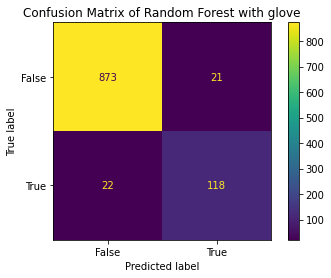

In [ ]:
#Confusion Matrix of Random Forest with glove
confusion_matrix6 = metrics.confusion_matrix(y_test1, y_pred_class6)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix6, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Random Forest with glove')
plt.show()

Random Forest Classifier with Word2Vec

In [ ]:
#fit Random Forest with word2vec
rf.fit(x_train_res3,y_train_res3)

RandomForestClassifier(criterion='entropy', max_depth=500, n_estimators=500)

In [ ]:
y_pred_class7 = rf.predict(test_vec)

# predict probabilities
y_pred_proba7 = rf.predict_proba(test_vec)

In [ ]:
# Metrics of Random Forest with word2Vec
from sklearn import metrics
rf_glv_acc = metrics.accuracy_score(y_test1, y_pred_class7)
print("Accuracy:",rf_glv_acc)
rf_glv_pre = metrics.precision_score(y_test1, y_pred_class7,pos_label='spam')
print("Precision:",rf_glv_pre)
rf_glv_rec = metrics.recall_score(y_test1, y_pred_class7,pos_label='spam')
print("Recall:",rf_glv_rec)
rf_glv_f1 = metrics.f1_score(y_test1, y_pred_class7,pos_label='spam')
print("F1 Score:",rf_glv_f1)

Accuracy: 0.9729206963249516
Precision: 0.9307692307692308
Recall: 0.8642857142857143
F1 Score: 0.8962962962962964


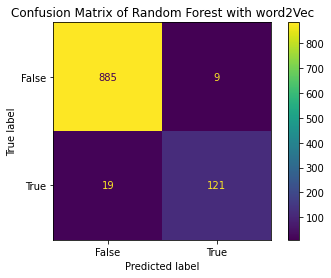

In [ ]:
#Confusion Matrix of Random Forest with word2Vec
confusion_matrix7 = metrics.confusion_matrix(y_test1, y_pred_class7)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix7, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix of Random Forest with word2Vec')
plt.show()